# Decision Tree

A decision tree algorithm is a machine learning algorithm used for both classification and regression tasks. The decision tree is a flowchart-like tree structure where each internal node represents a decision based on the value of a particular feature, and each leaf node represents the predicted outcome (class label or regression value). The algorithm makes decisions by recursively splitting the dataset based on the features, creating a tree-like structure.

# here we going to predict the people purchased or not using their age,Estimated salary 

In [60]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [61]:
#fetching data from csv file
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
244,15586996,Female,41,72000,0
245,15722061,Female,51,146000,1
246,15638003,Female,35,50000,0
247,15775590,Female,57,122000,1


In [62]:
#get only first 5 rows
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [63]:
#checking whether dataset has null values or not
dataset.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [64]:
#getting information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          249 non-null    int64 
 1   Gender           249 non-null    object
 2   Age              249 non-null    int64 
 3   EstimatedSalary  249 non-null    int64 
 4   Purchased        249 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB


In [65]:
#segregate the the x and y values(x-dependent variable,y-independent variable)
x=dataset.iloc[:,2:4].values
y=dataset.iloc[:,-1].values

In [66]:
x[0]

array([   19, 19000], dtype=int64)

In [67]:
y[0]

0

<Axes: xlabel='Purchased', ylabel='count'>

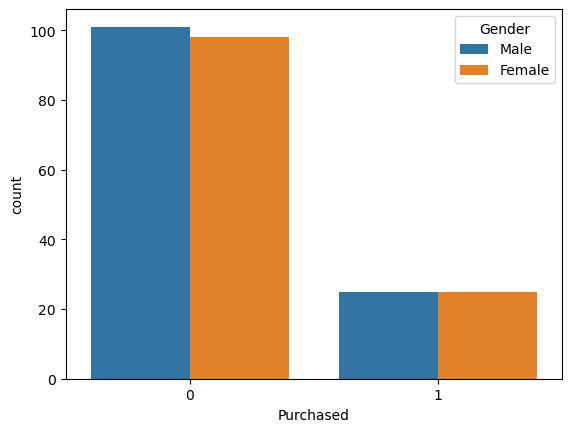

In [70]:
#draw the count plot to display purchased and non-purchased count genderwise
sns.countplot(data=dataset,x='Purchased',hue='Gender')

In [74]:
#draw the bar plot to display count of malepurchased,malenonpurchased,femalepurchased,femalnonpurchased using plotly
from plotly.offline import plot
import plotly.graph_objs as go
count_0_male=dataset[(dataset['Gender']=='Male') & (dataset['Purchased']==0)]
count_1_male=dataset[(dataset['Gender']=='Male') & (dataset['Purchased']==1)]
count_0_female=dataset[(dataset['Gender']=='Female') & (dataset['Purchased']==0)]
count_1_female=dataset[(dataset['Gender']=='Female') & (dataset['Purchased']==1)]
li=[len(count_0_male),len(count_1_male),len(count_0_female),len(count_1_female)]
li
trace=go.Bar(
x=['male_notpurchased','male_purchased'],
y=li[0:2],
name='MALE',
text=li[0:2]
)
trace2=go.Bar(
x=['female_notpurchased','female_purchased'],
y=li[2:4],
name='FEMALE',
text=li[2:4]
)
layout=go.Layout(
barmode='group'
)
fig=go.Figure(data=[trace,trace2],layout=layout)
fig.show()

In [26]:
#split the data for train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [27]:
#applying the standared for getting smae scale vales
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

In [29]:
#applying decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
#criterion='entropy', it means that the decision tree algorithm is using entropy as the impurity measure to evaluate the quality of splits for make decision tree
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [30]:
y_prd=classifier.predict(x_test)

In [31]:
y_prd

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

<Axes: >

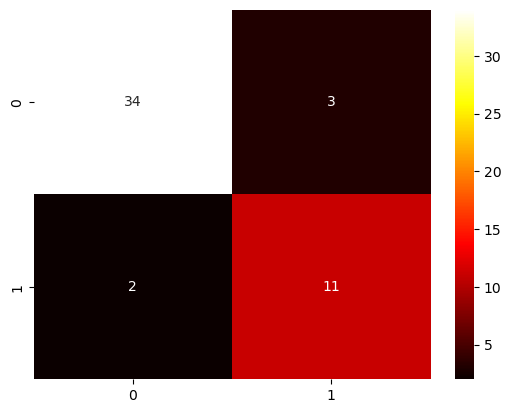

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_prd)
sns.heatmap(cm,annot=True,cmap='hot')

In [33]:
Accuracy=accuracy_score(y_test,y_prd)
print("ACCURACY IS:",Accuracy*100)

ACCURACY IS: 90.0
